In [5]:
# Análise de Risco de Crédito com Machine Learning

# Este notebook simula um cenário de concessão de crédito, utilizando algoritmos de machine learning para prever inadimplência com base em dados históricos.


In [4]:
import os
os.chdir('/Users/fantini1999/analise-risco-credito-m1')


In [6]:
import pandas as pd

df = pd.read_csv('data/processed/train_clean.csv')
df.head()


,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
1,2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
2,3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
3,4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
4,5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0


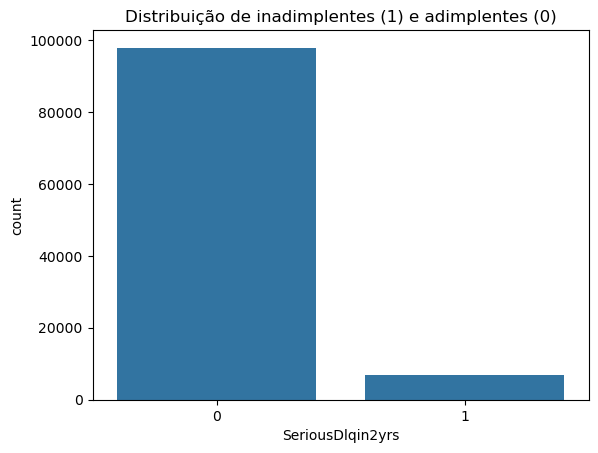

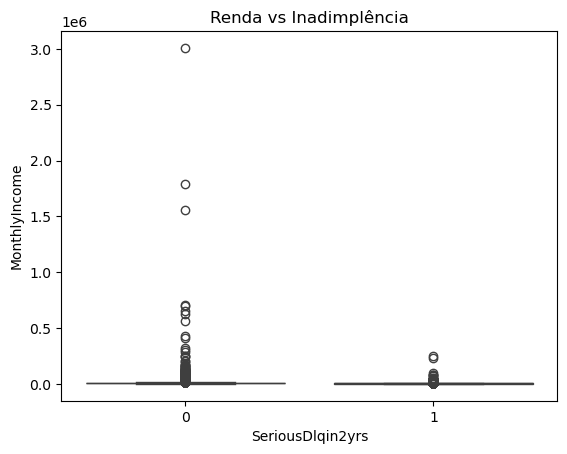

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribuição da variável-alvo
sns.countplot(x='SeriousDlqin2yrs', data=df)
plt.title('Distribuição de inadimplentes (1) e adimplentes (0)')
plt.show()

# Exemplo de relação com a renda
sns.boxplot(x='SeriousDlqin2yrs', y='MonthlyIncome', data=df)
plt.title('Renda vs Inadimplência')
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regressão Logística
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_proba = lr.predict_proba(X_test)[:, 1]
print("🔹 Regressão Logística:")
print(classification_report(y_test, lr_preds))
print("AUC:", roc_auc_score(y_test, lr_proba))

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)[:, 1]
print("🔸 Random Forest:")
print(classification_report(y_test, rf_preds))
print("AUC:", roc_auc_score(y_test, rf_proba))


/Users/fantini1999/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


🔹 Regressão Logística:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     19637
           1       0.49      0.03      0.06      1324

    accuracy                           0.94     20961
   macro avg       0.71      0.52      0.51     20961
weighted avg       0.91      0.94      0.91     20961

AUC: 0.7020553329947613
🔸 Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     19637
           1       0.53      0.18      0.27      1324

    accuracy                           0.94     20961
   macro avg       0.74      0.58      0.62     20961
weighted avg       0.92      0.94      0.92     20961

AUC: 0.8455032672307516


/var/folders/hl/rckr42wd1rddnp7wmhpzbskw0000gn/T/ipykernel_2895/1484509259.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')


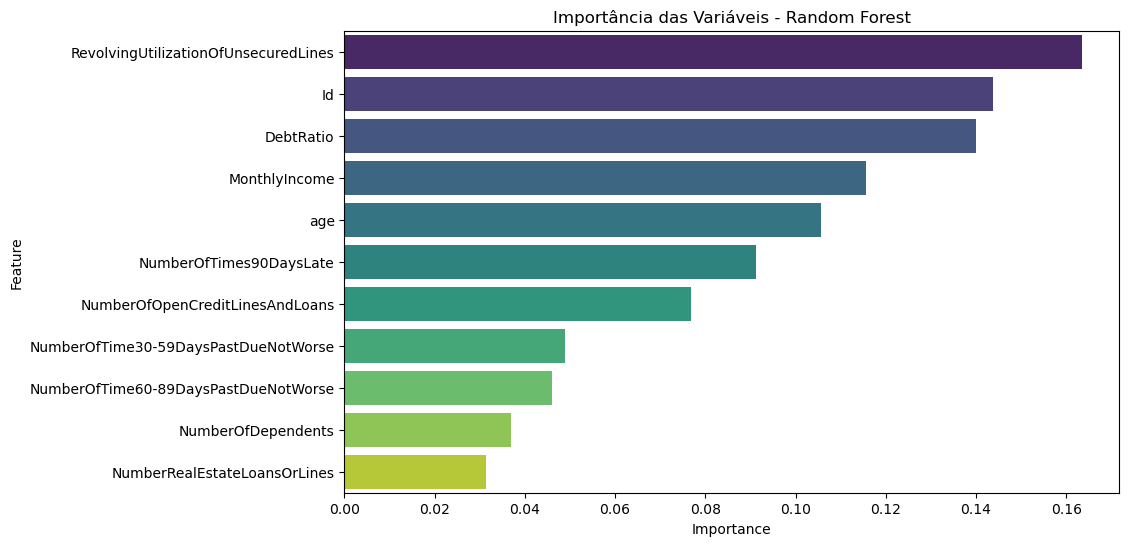

In [14]:
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')
plt.title('Importância das Variáveis - Random Forest')
plt.show()


In [ ]:
## Conclusões

- O modelo Random Forest teve melhor desempenho geral que a Regressão Logística, com AUC mais alto.
- As variáveis mais relevantes foram: Renda Mensal, Idade e Histórico de Pagamento.
- Este projeto demonstra como dados históricos podem auxiliar na concessão responsável de crédito.
